##### Import necessary libraries

In [56]:
import importlib
import scraper
import matplotlib.pyplot as plt
import pandas as pd

importlib.reload(scraper)  # Forces reloading of the scraper module

# from scraper import fetch_sold_listings, get_listing_details, debug_pagination, clean_price, categorize_bedrooms, save_table_as_image, save_listing_url_html

<module 'scraper' from 'c:\\Users\\USER\\Documents\\HouseSigma Scraper\\housesigma-scraper\\scraper.py'>

##### Test get listing details function

In [36]:
prices_df_temp = scraper.get_listing_details("housesigma_page_1.html")

print("\nPrices DF columns: ", prices_df_temp.columns)

print("\nFirst Address:", prices_df_temp['Address'][0])
print("\nFirst url:", prices_df_temp['Listing URL'][0])

print("\n" + "=" * 50)  # Separator line
print(prices_df_temp.shape)
print("\n" + "=" * 50)
print(prices_df_temp)

Reading html file

Prices DF columns:  Index(['Asking Price', 'Sold Price', 'Address', 'Unit Type', 'Bedrooms',
       'Bathrooms', 'Postal Code', 'Listing URL'],
      dtype='object')

First Address: 623 - 88 Colgate Ave , Toronto - South Riverdale

First url: https://housesigma.com/on/toronto-real-estate/623-88-colgate-ave/home/DnM697koZNd7bmwe/

(20, 8)

   Asking Price  Sold Price  \
0      $998,000    $975,000   
1    $1,259,000  $1,349,000   
2    $3,599,900  $3,250,000   
3      $825,000    $780,000   
4      $559,000    $529,000   
5    $1,399,999  $1,430,000   
6    $1,295,000  $1,249,000   
7    $1,458,900  $1,415,000   
8      $708,000    $668,000   
9    $1,079,000  $1,070,000   
10   $1,099,000  $1,400,000   
11     $628,888    $600,000   
12   $1,129,000  $1,100,000   
13   $1,079,000  $1,079,000   
14     $529,500    $490,000   
15     $899,000    $888,000   
16     $525,000    $538,888   
17     $849,900    $855,000   
18     $499,990    $575,000   
19   $1,049,900  $1,

##### Run the HouseSigma scraper

In [37]:
# Run the scraper
url = "https://housesigma.com/on/sold/map/?status=sold&lat=43.715564&lon=-79.418602&zoom=10&page=1&view=list"

# debug_pagination(url)

# sold_data_df = scraper.fetch_sold_listings(url, 40)

##### Check scraped df

In [38]:
print("\nDataframe shape: ", sold_data_df.shape)
print("\n" + "=" * 50)  # Separator line
print(sold_data_df.columns)
print("\n" + "=" * 50)
print(sold_data_df.head(20))


Dataframe shape:  (800, 8)

Index(['Asking Price', 'Sold Price', 'Address', 'Unit Type', 'Bedrooms',
       'Bathrooms', 'Postal Code', 'Listing URL'],
      dtype='object')

    Asking Price  Sold Price  \
0       998000.0    975000.0   
1      1259000.0   1349000.0   
2      3599900.0   3250000.0   
3       825000.0    780000.0   
4       559000.0    529000.0   
5      1399999.0   1430000.0   
6      1295000.0   1249000.0   
7      1458900.0   1415000.0   
8       708000.0    668000.0   
9      1079000.0   1070000.0   
10     1099000.0   1400000.0   
11      628888.0    600000.0   
12     1129000.0   1100000.0   
13     1079000.0   1079000.0   
14      529500.0    490000.0   
15      899000.0    888000.0   
16      525000.0    538888.0   
17      849900.0    855000.0   
18      499990.0    575000.0   
19     1049900.0   1035000.0   

                                              Address        Unit Type  \
0    623 - 88 Colgate Ave , Toronto - South Riverdale        Condo Apt   
1  

##### Apply Unit Type mapping

In [39]:
print(sold_data_df.columns)

# Apply the cleaning function to both columns
price_columns = ["Asking Price", "Sold Price"]
sold_data_df[price_columns] = sold_data_df[price_columns].applymap(scraper.clean_price)

category_mapping = {
    "Detached": "Detached",
    "Link": "Detached",
    "Single Family Residence": "Detached",
    "Apartment Unit, Condo/Apt Unit": "Condo Apt",
    "Row/Townhouse": "Freehold Townhouse"
}

sold_data_df["Unit Type"] = sold_data_df["Unit Type"].replace(category_mapping)

# List of Unit Types to exclude
exclude_unit_types = ["Other", "Vacant Land", "Parking Space"]

# Filter the DataFrame to exclude these Unit Types
filtered_sold_data_df = sold_data_df[~sold_data_df["Unit Type"].isin(exclude_unit_types)].reset_index(drop=True)

filtered_sold_data_df["Bedroom Category"] = filtered_sold_data_df["Bedrooms"].apply(scraper.categorize_bedrooms)

print(len(filtered_sold_data_df.index))
print(filtered_sold_data_df.head(20))

Index(['Asking Price', 'Sold Price', 'Address', 'Unit Type', 'Bedrooms',
       'Bathrooms', 'Postal Code', 'Listing URL'],
      dtype='object')
796
    Asking Price  Sold Price  \
0       998000.0    975000.0   
1      1259000.0   1349000.0   
2      3599900.0   3250000.0   
3       825000.0    780000.0   
4       559000.0    529000.0   
5      1399999.0   1430000.0   
6      1295000.0   1249000.0   
7      1458900.0   1415000.0   
8       708000.0    668000.0   
9      1079000.0   1070000.0   
10     1099000.0   1400000.0   
11      628888.0    600000.0   
12     1129000.0   1100000.0   
13     1079000.0   1079000.0   
14      529500.0    490000.0   
15      899000.0    888000.0   
16      525000.0    538888.0   
17      849900.0    855000.0   
18      499990.0    575000.0   
19     1049900.0   1035000.0   

                                              Address        Unit Type  \
0    623 - 88 Colgate Ave , Toronto - South Riverdale        Condo Apt   
1   84A Aylesworth Ave , Scar

C:\Users\USER\AppData\Local\Temp\ipykernel_8912\1107449495.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sold_data_df[price_columns] = sold_data_df[price_columns].applymap(scraper.clean_price)


##### Calculate average and median prices by Unit Type and by Unit Type and Bedrooms Category

In [40]:
print(filtered_sold_data_df.columns)
print("\n" + "=" * 50)  # Separator line
print(filtered_sold_data_df.shape)

# Average asking and sold prices by unit type
avg_prices = (
    filtered_sold_data_df.groupby("Unit Type")
    .agg(
        Asking_Price_Avg=("Asking Price", "mean"),
        Sold_Price_Avg=("Sold Price", "mean"),
        Sold_Price_Median=("Sold Price", "median"),
        Count=("Asking Price", "count")  # Counting the number of observations
    )
    .reset_index()
)

avg_prices = avg_prices.sort_values(by="Count", ascending=False).reset_index(drop=True)

# Format the average prices and counts for better readability
avg_prices["Asking_Price_Avg"] = avg_prices["Asking_Price_Avg"].apply(lambda x: f"${x:,.0f}")
avg_prices["Sold_Price_Avg"] = avg_prices["Sold_Price_Avg"].apply(lambda x: f"${x:,.0f}")
avg_prices["Sold_Price_Median"] = avg_prices["Sold_Price_Median"].apply(lambda x: f"${x:,.0f}")
avg_prices["Count"] = avg_prices["Count"].apply(lambda x: f"{x:,}")

# Display the formatted table
print("\nAverage Asking and Sold Price by Unit Type:\n")
print(avg_prices.to_string(index=False))

# Group by Unit Type and Bedrooms, then calculate average Asking and Sold Prices
avg_prices_with_count = (
    filtered_sold_data_df.groupby(["Unit Type", "Bedroom Category"])
    .agg(
        Count=("Asking Price", "count") ,
        Asking_Price_Avg=("Asking Price", "mean"),
        Sold_Price_Avg=("Sold Price", "mean"),
        Sold_Price_Median=("Sold Price", "median")
    )
    .reset_index()
)

avg_prices_with_count = avg_prices_with_count.sort_values(by="Count", ascending=False).reset_index(drop=True)

# Format the average prices and counts for better readability
avg_prices_with_count["Asking_Price_Avg"] = avg_prices_with_count["Asking_Price_Avg"].apply(lambda x: f"${x:,.0f}")
avg_prices_with_count["Sold_Price_Avg"] = avg_prices_with_count["Sold_Price_Avg"].apply(lambda x: f"${x:,.0f}")
avg_prices_with_count["Sold_Price_Median"] = avg_prices_with_count["Sold_Price_Median"].apply(lambda x: f"${x:,.0f}")
avg_prices_with_count["Count"] = avg_prices_with_count["Count"].apply(lambda x: f"{x:,}")

# Print the results
print("\nAverage Asking and Sold Price by Unit Type and Number of Bedrooms:")
print(avg_prices_with_count)


Index(['Asking Price', 'Sold Price', 'Address', 'Unit Type', 'Bedrooms',
       'Bathrooms', 'Postal Code', 'Listing URL', 'Bedroom Category'],
      dtype='object')

(796, 9)

Average Asking and Sold Price by Unit Type:

         Unit Type Asking_Price_Avg Sold_Price_Avg Sold_Price_Median Count
         Condo Apt         $763,355       $748,365          $620,000   375
          Detached       $1,756,425     $1,758,101        $1,448,000   238
   Condo Townhouse         $973,194       $975,644          $864,000    74
     Semi-Detached       $1,117,583     $1,213,347        $1,145,500    64
Freehold Townhouse       $1,227,956     $1,250,406        $1,150,000    33
           Triplex       $1,745,880     $1,667,400        $1,561,000     5
         Co-Op Apt         $807,966       $791,833          $715,000     3
    Condo/Apt Unit         $519,000       $504,500          $504,500     2
         Multiplex       $2,499,000     $2,262,500        $2,262,500     2

Average Asking and Sold Pri

##### Average and Median prices by Unit Category - save as png

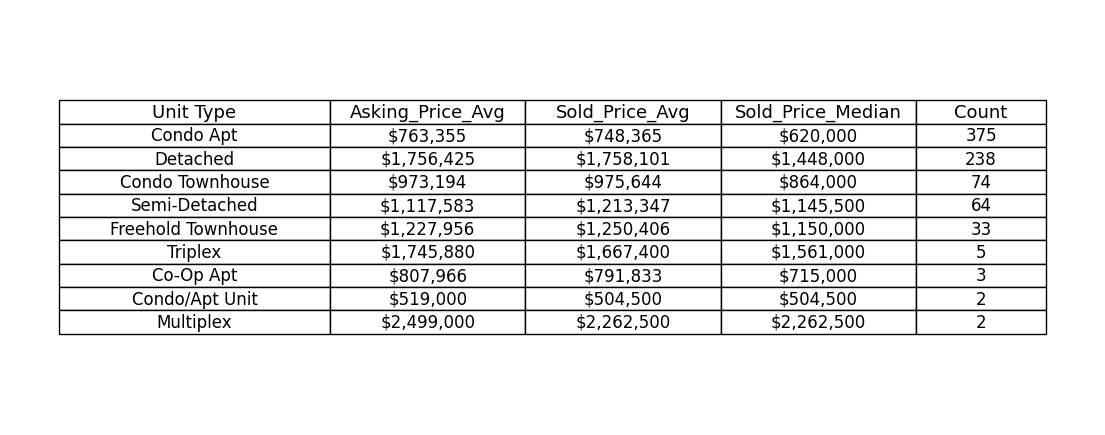

In [41]:
# Adjust the DataFrame to display
df_to_display = avg_prices  # Use your aggregated DataFrame

# Create the figure and axis with larger dimensions
fig, ax = plt.subplots(figsize=(14, len(df_to_display) * 0.6))  # Slightly wider figure
ax.axis('off')  # Hide the axis

# Create the table with improved alignment
table = ax.table(
    cellText=df_to_display.values,
    colLabels=df_to_display.columns,
    loc='center',
    cellLoc='center',        # Center-align cell content
    colLoc='center'          # Center-align column headers
)

# Adjust font size and scale for better fit
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.3, 1.4)  # Slightly increased scaling (width, height)

# Auto-adjust column widths based on content length
col_widths = [0.25, 0.18, 0.18, 0.18, 0.12]  # Adjusted column widths

# Apply column widths
for key, cell in table.get_celld().items():
    cell.set_text_props(ha='center', va='center')  # Center-align text
    if key[0] == 0:  # Header row
        cell.set_fontsize(13)  # Slightly larger font for headers
    if key[1] < len(col_widths):
        cell.set_width(col_widths[key[1]])  # Apply width based on column index

# Save the table as a high-resolution image
plt.savefig("average_prices_table_final.png", bbox_inches='tight', dpi=300)

# Optional: Display the image
plt.show()

##### Save tables as images (png)

In [42]:
scraper.save_table_as_image(
    avg_prices,
    "average_prices_table.png",
    col_widths=[0.25, 0.18, 0.18, 0.18, 0.12]  # Custom widths for 5 columns
)

scraper.save_table_as_image(
    avg_prices_with_count,
    "average_prices_with_bedrooms_table.png",
    col_widths=[0.20, 0.18, 0.10, 0.18, 0.18, 0.18]  # Adjusted widths for 6 columns
)

##### Print unique postal codes and postal code areas

In [43]:
filtered_sold_data_df["Postal Code Area"] = filtered_sold_data_df["Postal Code"].apply(lambda x: x[:3] if pd.notna(x) else "N/A")

print(filtered_sold_data_df['Postal Code'].unique())
print("\n--------")
print(filtered_sold_data_df['Postal Code Area'].unique())

['M4M0A6' 'M1N2J6' 'L5G1Y8' 'L4L0H8' 'M5H4C9' 'L4H1X1' 'M1M2M3' 'M4S0B9'
 'M4W3W6' 'L4W3C2' 'M4J4L4' 'L4K0M6' 'M1H1X6' 'L3S4P2' 'M6A1X5' 'M4W3Z4'
 'L4B4P6' 'M1B4H2' 'M2J0E2' 'L5A3G2' 'M1P4K6' 'M1R4M5' 'L4K0M7' 'M2N1J9'
 'M4K2X6' 'M9M0A5' 'M3A3C5' 'M4G1X7' 'M9W7J4' 'M4K1B5' 'M5P0A2' 'L5A3M2'
 'M3N1R9' 'M5V2K3' 'M6H3W3' 'L4W2S8' 'M6S3M5' 'L3R4G4' 'M5P2E7' 'M4W1K3'
 'M9A0A1' 'M1P3N8' 'M1S4V3' 'M9R1T4' 'M9W7J6' 'L5H1Y8' 'M8Y0C7' 'M9C4N8'
 'M6B3B4' 'M4V1Y1' 'M9C1G7' 'M4N3P9' 'M4M1M5' 'M1P4Z3' 'L4J7M2' 'M1V3S5'
 'L3R7E5' 'M1J1S8' 'M1J0A9' 'L5B0B9' 'L6A2Z5' 'L6B0V5' 'M3N2K9' 'M5V0L4'
 'M1T3S4' 'M1K5A7' 'M2K0B3' 'M5V1K5' 'M5S0A4' 'M9W4G9' 'M5V1B7' 'M5A0E7'
 'L6A0K1' 'M2N6G9' 'M1V3N4' 'M8V2L2' 'M6P2S5' 'L3T7W6' 'M1P4B4' 'L5G0B3'
 'L3R2T9' 'L4S0B1' 'L4Y2W4' 'M3C3P3' 'M3C1A1' 'M6M5A7' 'L4L1Y3' 'M6R1H5'
 'M1W3T8' 'M1R2C1' 'M5V0S6' 'M5V0J9' 'M2N0G5' 'M4S0B1' 'M6G4C2' 'L4L8B2'
 'L5A2S2' 'M2N7G3' 'M6B3L8' 'M9A4K5' 'M4M2P7' 'M1K3C7' 'M1S4Y8' 'L6A4X7'
 'M5B1L3' 'M4C4C6' 'M3K1A5' 'M8V1X5' 'L4J7K9' 'M3H0

##### Calculate average and median prices by postal code area

In [44]:
# ✅ Filter the original DataFrame BEFORE aggregation
filtered_data = filtered_sold_data_df[
    (~filtered_sold_data_df["Bedrooms"].isin(["1", "0"])) &  # ✅ Exclude Bedrooms = "1" or "0"
    (filtered_sold_data_df["Count"] > 1 if "Count" in filtered_sold_data_df.columns else True)  # Handle Count if it exists
]

# Group by Postal Code Area after filtering
postal_aggregates = (
    filtered_data.groupby("Postal Code Area")
    .agg(
        Asking_Price_Avg=("Asking Price", "mean"),
        Sold_Price_Avg=("Sold Price", "mean"),
        Sold_Price_Median=("Sold Price", "median"),
        Count=("Asking Price", "count")  # Counting the number of observations
    )
    .reset_index()
)

# ✅ Filter out postal codes where Count = 1 AFTER aggregation
postal_aggregates = postal_aggregates[postal_aggregates["Count"] > 1]

# ✅ Sort by Sold_Price_Median in descending order BEFORE formatting
postal_aggregates = postal_aggregates.sort_values(by="Sold_Price_Median", ascending=False)

# Format the average prices, median, and counts for better readability
postal_aggregates["Asking_Price_Avg"] = postal_aggregates["Asking_Price_Avg"].apply(lambda x: f"${x:,.0f}")
postal_aggregates["Sold_Price_Avg"] = postal_aggregates["Sold_Price_Avg"].apply(lambda x: f"${x:,.0f}")
postal_aggregates["Sold_Price_Median"] = postal_aggregates["Sold_Price_Median"].apply(lambda x: f"${x:,.0f}")
postal_aggregates["Count"] = postal_aggregates["Count"].apply(lambda x: f"{x:,}")

# Display the sorted DataFrame
print(postal_aggregates.to_string(index=False))

Postal Code Area Asking_Price_Avg Sold_Price_Avg Sold_Price_Median Count
             M2L       $4,201,600     $3,815,800        $4,412,000     5
             M5S       $3,785,500     $3,553,250        $3,054,000     4
             L5H       $2,894,000     $2,697,500        $2,697,500     2
             L5G       $2,727,450     $2,555,000        $2,650,000     4
             M4V       $2,560,000     $2,666,286        $2,600,000     7
             L4S       $1,943,844     $2,034,000        $2,034,000     2
             M6C       $2,108,000     $2,106,509        $2,020,000     4
             M6R       $1,824,666     $1,831,000        $2,001,000     3
             L6A       $1,901,279     $1,877,083        $1,940,000    12
             M4N       $1,866,500     $1,926,000        $1,926,000     2
             M2R       $1,949,000     $1,850,000        $1,850,000     2
             M4K       $1,428,000     $1,745,585        $1,776,500     6
             L4C       $2,032,738     $1,988,875   

In [45]:
# Group by Postal Code Area and Unit Type
postal_unit_aggregates = (
    filtered_sold_data_df.groupby(["Postal Code Area", "Unit Type"])
    .agg(
        Asking_Price_Avg=("Asking Price", "mean"),
        Sold_Price_Avg=("Sold Price", "mean"),
        Sold_Price_Median=("Sold Price", "median"),
        Count=("Asking Price", "count")  # Counting the number of observations
    )
    .reset_index()
)

# Format the average prices, median, and counts for better readability
postal_unit_aggregates["Asking_Price_Avg"] = postal_unit_aggregates["Asking_Price_Avg"].apply(lambda x: f"${x:,.0f}")
postal_unit_aggregates["Sold_Price_Avg"] = postal_unit_aggregates["Sold_Price_Avg"].apply(lambda x: f"${x:,.0f}")
postal_unit_aggregates["Sold_Price_Median"] = postal_unit_aggregates["Sold_Price_Median"].apply(lambda x: f"${x:,.0f}")
postal_unit_aggregates["Count"] = postal_unit_aggregates["Count"].apply(lambda x: f"{x:,}")

# Display the aggregated DataFrame
print(postal_unit_aggregates.to_string(index=False))

Postal Code Area          Unit Type Asking_Price_Avg Sold_Price_Avg Sold_Price_Median Count
             L3P          Condo Apt         $799,800       $765,000          $765,000     1
             L3P    Condo Townhouse         $899,000       $890,000          $890,000     1
             L3P           Detached       $2,788,500     $2,525,200        $2,525,200     2
             L3R          Condo Apt       $1,291,250     $1,185,125          $982,750     4
             L3R    Condo Townhouse         $849,450       $936,500          $936,500     2
             L3R           Detached       $2,533,327     $2,385,629        $2,728,888     3
             L3S           Detached       $1,171,120     $1,184,600        $1,220,000     5
             L3S      Semi-Detached       $1,173,500     $1,157,000        $1,157,000     2
             L3T          Condo Apt         $664,580       $645,500          $554,500     5
             L3T    Condo Townhouse         $814,333       $784,833          $76

In [46]:
# ✅ Set display options for better formatting
pd.set_option('display.max_columns', None)        # Show all columns without truncation
pd.set_option('display.width', 200)               # Increase display width to prevent line breaks
pd.set_option('display.max_colwidth', None)       # Prevent truncation of long text (like addresses)
pd.set_option('display.colheader_justify', 'center')  # Center-align column headers

# ✅ Check data for a specific postal code area
select_cols = ["Postal Code Area", "Address", "Bedrooms", "Asking Price", "Sold Price"]
check_area = "M1H"

# ✅ Filter the data
filtered_data = filtered_sold_data_df[filtered_sold_data_df["Postal Code Area"] == check_area][select_cols].copy()
filtered_data = filtered_data[filtered_data['Bedrooms'] != '1']

# ✅ Format dollar values with $ and commas
filtered_data["Asking Price"] = filtered_data["Asking Price"].apply(lambda x: f"${x:,.0f}" if pd.notna(x) else "N/A")
filtered_data["Sold Price"] = filtered_data["Sold Price"].apply(lambda x: f"${x:,.0f}" if pd.notna(x) else "N/A")

# ✅ Display the data without showing the index
print(filtered_data.to_string(index=False))

Postal Code Area                 Address                 Bedrooms Asking Price Sold Price
      M1H        82 Sedgemount Dr , Scarborough - Woburn   3+4     $1,129,000  $1,100,000
      M1H         99 Rochman Blvd , Scarborough - Woburn     3       $749,900    $820,000
      M1H        175 Lynnbrook Dr , Scarborough - Woburn   3+3       $999,999  $1,260,000


##### Save scraped data as csv

In [50]:
print(filtered_sold_data_df.shape)
print(filtered_sold_data_df.columns)
print("\n" + "=" * 50)  # Separator line
print(filtered_sold_data_df.head(20))

filtered_sold_data_df.to_csv('filtered_sold_data.csv', index=False)

(796, 10)
Index(['Asking Price', 'Sold Price', 'Address', 'Unit Type', 'Bedrooms', 'Bathrooms', 'Postal Code', 'Listing URL', 'Bedroom Category', 'Postal Code Area'], dtype='object')

    Asking Price  Sold Price                          Address                              Unit Type     Bedrooms Bathrooms Postal Code  \
0      998000.0     975000.0           623 - 88 Colgate Ave , Toronto - South Riverdale        Condo Apt      2        2       M4M0A6     
1     1259000.0    1349000.0   84A Aylesworth Ave , Scarborough - Birchcliffe-Cliffside         Detached      4        5       M1N2J6     
2     3599900.0    3250000.0                    501 Avonwood Dr , Mississauga - Mineola         Detached      4        4       L5G1Y8     
3      825000.0     780000.0        314 - 199 Pine Grove Rd , Vaughan - East Woodbridge  Condo Townhouse      2        2       L4L0H8     
4      559000.0     529000.0  517 - 168 Simcoe St , Toronto - Waterfront Communities C1        Condo Apt      1        1 

##### Loop through listing URLs to get more info about each listing

In [51]:
# test function save_listing_url_html
test_url = prices_df_temp['Listing URL'][0]
unit_type_test = prices_df_temp['Unit Type'][0]
print(f"\nGetting data for unit {unit_type_test}, URL: {test_url}")


Getting data for unit Condo Apt, URL: https://housesigma.com/on/toronto-real-estate/623-88-colgate-ave/home/DnM697koZNd7bmwe/


##### Test function save_listing_url_html

In [52]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import time

# options = webdriver.ChromeOptions()
# options.add_argument("--disable-blink-features=AutomationControlled")
# options.add_experimental_option("excludeSwitches", ["enable-automation"])
# options.add_experimental_option("useAutomationExtension", False)

# driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

# # ✅ Open HouseSigma for manual login
# driver.get("https://housesigma.com")
# input("🔑 Press Enter after logging in manually...")  # ⬅️ Login manually, then press Enter

# output_filename = "listing_page.html"

# # ✅ Save the full HTML content
# scraper.save_listing_url_html(driver, test_url, output_filename, unit_type_test)

# # ✅ Close the browser after saving
# driver.quit()

##### Loop through listing urls
###### Filter for specific units / bedrooms (otherwise takes a long time to run through all urls)

In [59]:
print(filtered_sold_data_df['Bedroom Category'].unique())
print("\n" + "=" * 50)  # Separator line

bedroom_counts = filtered_sold_data_df['Bedroom Category'].value_counts()

# Print the counts by Bedroom Category
print(bedroom_counts)

['2' '3+' '1' '1+1' '2+1' '2+2' '0' '0+1']

Bedroom Category
3+     390
2      166
1+1     93
2+1     78
1       59
2+2      5
0        4
0+1      1
Name: count, dtype: int64


In [61]:
# Define the categories you want to filter
desired_categories = ['3+', '2+1', '2+2']

# Filter the DataFrame based on the desired categories
subset_df = filtered_sold_data_df[filtered_sold_data_df['Bedroom Category'].isin(desired_categories)].copy().reset_index(drop=True)

print(subset_df.shape)

# Save the subset DataFrame to a CSV file
subset_df.to_csv('subset_bedroom_categories.csv', index=False)

# Print the first few rows of the subset DataFrame to verify
print(subset_df.head())

(473, 10)
   Asking Price  Sold Price                          Address                          Unit Type Bedrooms Bathrooms Postal Code  \
0    1259000.0    1349000.0  84A Aylesworth Ave , Scarborough - Birchcliffe-Cliffside  Detached     4         5       M1N2J6     
1    3599900.0    3250000.0                   501 Avonwood Dr , Mississauga - Mineola  Detached     4         4       L5G1Y8     
2    1399999.0    1430000.0                 22 Sgotto Blvd , Vaughan - Sonoma Heights  Detached     3         4       L4H1X1     
3    1295000.0    1249000.0                63 Thatcher Ave , Scarborough - Cliffcrest  Detached     3         3       M1M2M3     
4    1079000.0    1070000.0                4254 Poltava Cres , Mississauga - Rathwood  Detached     4         2       L4W3C2     

                                          Listing URL                                          Bedroom Category Postal Code Area  
0  https://housesigma.com/on/scarborough-real-estate/84a-aylesworth-ave/home/L

In [62]:
print("🔄 Reinitializing WebDriver...")

options = webdriver.ChromeOptions()
options.add_argument("--disable-blink-features=AutomationControlled")
options.add_experimental_option("excludeSwitches", ["enable-automation"])
options.add_experimental_option("useAutomationExtension", False)

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

# ✅ Open HouseSigma for manual login
driver.get("https://housesigma.com")
input("🔑 Press Enter after logging in manually...")  # ⬅️ Login manually, then press Enter

extracted_data = scraper.process_with_progress(subset_df, driver, progress_interval=100)

# ✅ Convert the extracted dictionary output into a DataFrame
extracted_df = extracted_data.apply(pd.Series)

# ✅ Close the browser after processing all listings
driver.quit()
print(extracted_df.shape)
print("\n✅ All listings processed. Browser closed.")

🔄 Reinitializing WebDriver...
🚀 Processing row 1/473
🚀 Processing row 101/473
🚀 Processing row 201/473
🚀 Processing row 301/473
🚀 Processing row 401/473
🚀 Processing row 473/473
(473, 3)

✅ All listings processed. Browser closed.


In [63]:
print(extracted_df.shape)

# Save the subset DataFrame to a CSV file
extracted_df.to_csv('extracted_df.csv', index=False)

(473, 3)


###### Check results

In [ ]:
print(extracted_df.shape)
print("\n" + "=" * 50)  # Separator line
print(extracted_df.head())

# ✅ Convert "Sold Days Ago" into "Sale Date"
extracted_df["Sold Days Ago"] = pd.to_numeric(extracted_df["Sold Days Ago"], errors="coerce")
extracted_df["Sale Date"] = (pd.to_datetime("today") - pd.to_timedelta(extracted_df["Sold Days Ago"], unit="D")).dt.strftime("%Y-%m-%d")
extracted_df["Sale Date"] = extracted_df["Sale Date"].fillna("N/A")

print("\n" + "=" * 50)  # Separator line
print(extracted_df.shape)
print(extracted_df.head())

subset_df = pd.concat([subset_df, extracted_df], axis=1)
print("\n" + "=" * 50)  # Separator line
print(subset_df.shape)
print(subset_df.head())

(20, 4)

   Sold Days Ago Maintenance Fees  \
0       17          $708/month      
1        8          $451/month      
2        9                 N/A      
3        9          $587/month      
4        9                 N/A      

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                